# import libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# import data

In [18]:
data = pd.read_csv('model_selection_data.csv',header=None)
data

,0,1
0,1651.000000,432.645217
1,1691.816327,454.935530
2,1732.632653,471.525248
3,1773.448980,482.506389
4,1814.265306,468.357886
5,1855.081633,482.152531
6,1895.897959,540.021756
7,1936.714286,534.584267
8,1977.530612,558.346208
9,2018.346939,566.423445


In [19]:
x= np.array(data[0])
y= np.array(data[1])
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

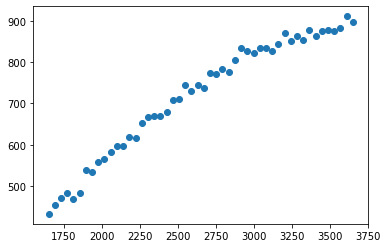

In [20]:
plt.scatter(x,y)

In [21]:
x_train , x_evaluation , y_trian , y_evaluation = train_test_split(x,y,test_size=0.6,random_state=1)
x_test , x_cv , y_test , y_cv = train_test_split(x_evaluation,y_evaluation,test_size=0.5,random_state=1)

# find best model selection

## usefull classes

In [22]:
train_error = []
cv_error = []
model = []
scaler_degree = []

In [23]:
for d in range(1,11,1):
    
    polynomial = PolynomialFeatures(d,include_bias=False)
    x_poly = polynomial.fit_transform(x_train)
    
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_poly)
    scaler_degree.append(scaler)
    
    linear_model = LinearRegression()
    linear_model.fit(x_scaled,y_trian)
    model.append(linear_model)
    
    y_hat_train = linear_model.predict(x_scaled)
    train_error.append(mean_squared_error(y_hat_train,y_trian))
    
    polynomial = PolynomialFeatures(d,include_bias=False)
    x_cv_poly = polynomial.fit_transform(x_cv)
    x_cv_scaled = scaler.transform(x_cv_poly)
    y_hat_cv = linear_model.predict(x_cv_scaled)
    cv_error.append(mean_squared_error(y_hat_cv,y_cv))
                       

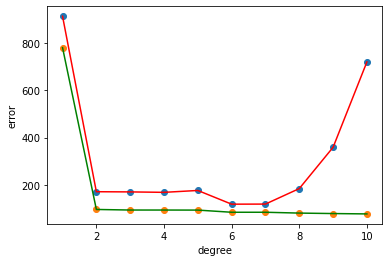

In [24]:
degree = np.arange(1,11,1)
plt.scatter(degree,cv_error)
plt.scatter(degree,train_error)
plt.xlabel("degree")
plt.ylabel("error")
plt.plot(degree,cv_error,'r')
plt.plot(degree,train_error,'g')
plt.show()

In [25]:
# best_model_index = cv_error.index(min(cv_error))
best_model_index =3
best_model_degree = best_model_index+1


In [26]:
polynomial = PolynomialFeatures(best_model_degree,include_bias=False)
x_test_poly = polynomial.fit_transform(x_test)
scaler_best_index= scaler_degree[best_model_index]
x_test_scaled = scaler_best_index.transform(x_test_poly)
y_test_hat = model[best_model_index].predict(x_test_scaled)

In [27]:
print("best degree = ",best_model_degree)
print("mean square error of model = ",mean_squared_error(y_test_hat,y_test))


best degree =  4
mean square error of model =  147.82511193615204


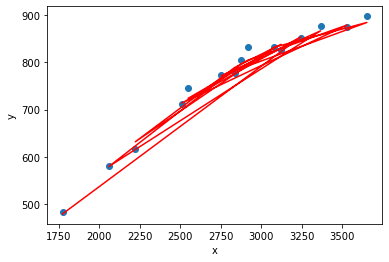

In [28]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_hat,'r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()